In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

import requests 
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from bs4 import BeautifulSoup
import xml
!conda install -c conda-forge folium=0.5.0 --yes 
import folium 
print('Libraries imported.')

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\xyzbo\Anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.7.12               |           py37_0         3.0 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.20.0-py_0

The following packages will be SUPERSEDED by a higher-priority channel:

  conda                                           pkgs/main --> conda-forge




geographiclib-1.

In [16]:
import pandas as pd

In [4]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [6]:
import requests

                       ALL THE REQUIRED LIBRARIES ARE LOADED AND NOW WE CAN START OUR ANALYSIS

In [11]:
r = requests.get('https://opendata.arcgis.com/datasets/823d86e17a6d47808c6e4f1c2dd97928_0.geojson')
fredericton_geo = r.json()

In [12]:
neidat = fredericton_geo['features']


In [13]:
g = requests.get('https://opendata.arcgis.com/datasets/6179d35eacb144a5b5fdcc869f86dfb5_0.geojson')
demog_geo = g.json()
demog_data = demog_geo['features']

# Now lets examine the crime count in the neighbourhoods

In [18]:
opencrime = 'Crime_by_neighbourhood_2017.xlsx'


In [44]:
workbook = pd.read_csv("Crime_by_neighbourhood_2017.csv")

In [24]:
workbook.head()

,Neighbourhood,From_Date,To_Date,Crime_Code,Crime_Type,Ward,City,FID
0,Fredericton South,2017-01-05T00:00:00.000Z,2017-01-26T00:00:00.000Z,2120,B&E NON-RESIDNCE,7,Fredericton,1
1,Fredericton South,2017-03-04T00:00:00.000Z,2017-03-06T00:00:00.000Z,2120,B&E NON-RESIDNCE,7,Fredericton,2
2,Fredericton South,2017-05-07T00:00:00.000Z,NaN,2120,B&E NON-RESIDNCE,12,Fredericton,3
3,Fredericton South,2017-06-20T00:00:00.000Z,2017-06-21T00:00:00.000Z,2120,B&E NON-RESIDNCE,12,Fredericton,4
4,Fredericton South,2017-07-09T00:00:00.000Z,2017-07-10T00:00:00.000Z,2120,B&E NON-RESIDNCE,7,Fredericton,5


In [26]:
workbook.drop(['From_Date', 'To_Date'], axis=1,inplace=True)


In [27]:
workbook = workbook.groupby(['Neighbourhood']).size().to_frame(name='Count').reset_index()


In [28]:
workbook

,Neighbourhood,Count
0,Barkers Point,47
1,Brookside,54
2,Brookside Estates,9
3,Brookside Mini Home Park,5
4,College Hill,41
5,Colonial heights,9
6,Cotton Mill Creek,4
7,Diamond Street,1
8,Doak Road,1
9,Douglas,3


In [30]:
from geopy.geocoders import Nominatim


In [31]:
address = 'Fredericton, Canada'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Fredericton, New Brunswick is {}, {}.'.format(latitude, longitude))

C:\Users\xyzbo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


Fredericton, New Brunswick is 45.966425, -66.645813.


                       This is the location of the city

In [34]:
world_geo = r'world_countries.json' # geojson file

fredericton_1_map = folium.Map(location=[45.97, -66.65], width=1000, height=750,zoom_start=12)

fredericton_1_map

In [33]:
import folium

In [41]:
fredericton_geo = r.json()
threshold_scale = np.linspace(workbook['Count'].min(),workbook['Count'].max(), 6,dtype=int)
threshold_scale = threshold_scale.tolist()
threshold_scale[-1] = threshold_scale[-1]+1
fredericton_1_map.choropleth(geo_data=fredericton_geo, data=workbook,columns=['Neighbourhood', 'Count'],
    key_on='feature.properties.Neighbourh', threshold_scale=threshold_scale,fill_color='YlOrRd', fill_opacity=0.7, 
    line_opacity=0.1, legend_name='Fredericton Neighbourhoods')
fredericton_1_map

In [36]:
import numpy as np

In [39]:
workbook.head()

,Neighbourhood,Count
0,Barkers Point,47
1,Brookside,54
2,Brookside Estates,9
3,Brookside Mini Home Park,5
4,College Hill,41


# Hence we have examined the crime count in each neighbourhood

# Now lets examine each crime type  

In [45]:
crimetype_data = workbook.groupby(['Crime_Type']).size().to_frame(name='Count').reset_index()
crimetype_data

,Crime_Type,Count
0,,4
1,ARSON,5
2,ARSON BY NEG,1
3,ARSON-DAM.PROP.,4
4,B&E NON-RESIDNCE,51
5,B&E OTHER,58
6,B&E RESIDENCE,151
7,B&E STEAL FIREAR,3
8,MISCHIEF OBS USE,1
9,MISCHIEF TO PROP,246


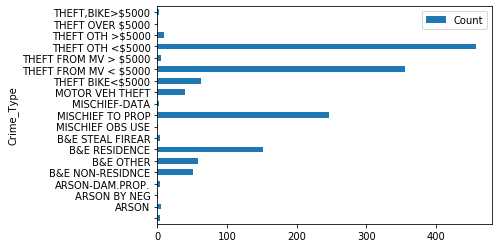

In [47]:
crimetype_data.plot(x='Crime_Type', y='Count', kind='barh')


# Theft from what kind of vechicles


In [48]:
mvcrime_df = workbook.loc[workbook['Crime_Type'] == 'THEFT FROM MV < $5000']
mvcrime_df

,Neighbourhood,From_Date,To_Date,Crime_Code,Crime_Type,Ward,City,FID
18,Fredericton South,2017-01-30T00:00:00.000Z,2017-01-30T00:00:00.000Z,2142,THEFT FROM MV < $5000,7,Fredericton,19
19,Fredericton South,2017-02-03T00:00:00.000Z,NaN,2142,THEFT FROM MV < $5000,7,Fredericton,20
20,Fredericton South,2017-02-25T00:00:00.000Z,2017-03-01T00:00:00.000Z,2142,THEFT FROM MV < $5000,7,Fredericton,21
21,Fredericton South,2017-03-15T00:00:00.000Z,2017-03-16T00:00:00.000Z,2142,THEFT FROM MV < $5000,12,Fredericton,22
22,Fredericton South,2017-03-14T00:00:00.000Z,2017-03-22T00:00:00.000Z,2142,THEFT FROM MV < $5000,12,Fredericton,23
23,Fredericton South,2017-04-17T00:00:00.000Z,NaN,2142,THEFT FROM MV < $5000,7,Fredericton,24
24,Fredericton South,2017-06-08T00:00:00.000Z,NaN,2142,THEFT FROM MV < $5000,7,Fredericton,25
25,Fredericton South,2017-06-19T00:00:00.000Z,NaN,2142,THEFT FROM MV < $5000,7,Fredericton,26
26,Fredericton South,2017-07-26T00:00:00.000Z,2017-07-27T00:00:00.000Z,2142,THEFT FROM MV < $5000,11,Fredericton,27
27,Fredericton South,2017-07-30T00:00:00.000Z,NaN,2142,THEFT FROM MV < $5000,11,Fredericton,28


In [49]:
mvcrime_data = mvcrime_df.groupby(['Neighbourhood']).size().to_frame(name='Count').reset_index()
mvcrime_data

,Neighbourhood,Count
0,Barkers Point,8
1,Brookside Estates,3
2,College Hill,10
3,Colonial heights,6
4,Diamond Street,1
5,Douglas,1
6,Downtown,21
7,Dun's Crossing,9
8,Forest Hill,8
9,Fredericton South,20


In [50]:
world_geo = r'world_countries.json' # geojson file

fredericton_c_map = folium.Map(location=[45.91, -66.65], width=1000, height=750,zoom_start=12)

fredericton_c_map


In [52]:
fredericton_geo = r.json()
threshold_scale = np.linspace(mvcrime_data['Count'].min(), mvcrime_data['Count'].max(),6,dtype=int)
threshold_scale = threshold_scale.tolist()
threshold_scale[-1] = threshold_scale[-1]+1

fredericton_c_map.choropleth(geo_data=fredericton_geo,data=mvcrime_data,columns=['Neighbourhood', 'Count'],key_on='feature.properties.Neighbourh',
    threshold_scale=threshold_scale, fill_color='YlOrRd',fill_opacity=0.7,line_opacity=0.1,legend_name='Fredericton Neighbourhoods')
fredericton_c_map

# Lets look at specific locations


In [57]:
pointbook = 'Fredericton Locations.xlsx'
workbook_2 = pd.ExcelFile(pointbook)
print(workbook_2.sheet_names)

['Sheet1']


In [58]:
location_df = workbook_2.parse('Sheet1')
location_df


,Unnamed: 0,Location,Latitude,Longitude
0,0,Knowledge Park,45.931143,-66.652700
1,1,Fredericton Downtown,45.963026,-66.383550
2,2,Fredericton Hill,45.948512,-66.656045
3,3,Nashwaaksis,45.983382,-66.644856
4,4,University of New Brunswick,45.948121,-66.641406
5,5,Devon,45.968802,-66.622738
6,6,New Maryland,45.892795,-66.683673
7,7,Marysville,45.978913,-66.589491
8,8,Skyline Acres,45.931827,-66.640339
9,9,Hanwell,45.902315,-66.755113


In [59]:
for lat, lng, point in zip(location_df['Latitude'], location_df['Longitude'], location_df['Location']):
    label = '{}'.format(point)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],radium=1,popup=label,color='blue',fill=True,fill_color='#3186cc',fill_opacity=0.7,
        parse_html=False).add_to(fredericton_c_map)
fredericton_c_map